In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True,
# 	help="accuracy plot")
# args = vars(ap.parse_args())
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 700772548410025679
xla_global_id: -1
]


In [3]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [4]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [5]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [6]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2743 - accuracy: 0.1990 - val_loss: 2.2391 - val_accuracy: 0.2819
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 2.2066 - accuracy: 0.3836 - val_loss: 2.1659 - val_accuracy: 0.4279
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 2.1211 - accuracy: 0.5025 - val_loss: 2.0624 - val_accuracy: 0.5730
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 1.9980 - accuracy: 0.5702 - val_loss: 1.9135 - val_accuracy: 0.6264
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 1.8282 - accuracy: 0.6237 - val_loss: 1.7193 - val_accuracy: 0.6813
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 1.6223 - accuracy: 0.6695 - val_loss: 1.5012 - val_accuracy: 0.7020
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 1.4093 - accuracy: 0.7071 - val_loss: 1.

In [7]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Calculate accuracy
accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
print("Accuracy:", accuracy*100)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 1ms/step
Accuracy: 92.44
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.89       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.89      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



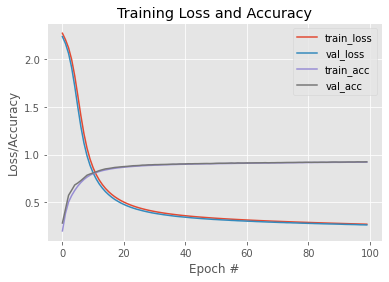

In [8]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()